<a href="https://www.kaggle.com/code/khushalkarim/house-prices-advanced-regression-techniques?scriptVersionId=107326479" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#With having 79 variables describing every aspect of residential homes in Ames, Iowa, this competition challenges  to predict the final price
#of each home. I used Gradient Boosting Regressor To Predict The Sale Price


**Importing Necessary Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

**Loading Training Dataset**

In [3]:
filee=pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")

**Checking Missing Values In Training Dataset Using Heatmap**

<AxesSubplot:>

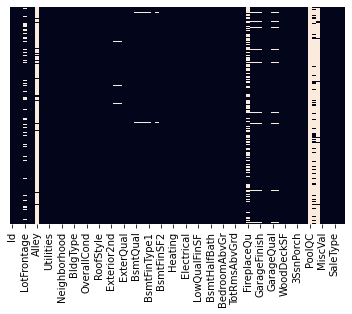

In [4]:
sns.heatmap(filee.isnull(),yticklabels=False,cbar=False)

**Dropping Columns Which Have Maximum Missing Values**

In [5]:
filee.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'BsmtCond'], axis=1, inplace = True)

**Putting Mean Values In Columns Which Have Numerical Values and Have Missing Values**

In [6]:
floatt=filee[["MasVnrArea", "GarageYrBlt", "LotFrontage"]]
for i in floatt:
    filee[i]=filee[i].fillna(filee[i].mean())

**Converting All Columns Object Data Types Into String(This Is Important When Any Column Has Mixed Data Types such as. 'RL12')**

In [7]:
objectt_total=filee[["MSZoning", "Street", "LotShape", "LandContour", "Utilities", "LotConfig", "LandSlope", "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual", "ExterCond", "Foundation", "BsmtQual", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Heating", "HeatingQC", "CentralAir", "Electrical", "KitchenQual", "Functional", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PavedDrive", "SaleType", "SaleCondition"]] = filee[["MSZoning", "Street", "LotShape", "LandContour", "Utilities", "LotConfig", "LandSlope", "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual", "ExterCond", "Foundation", "BsmtQual", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Heating", "HeatingQC", "CentralAir", "Electrical", "KitchenQual", "Functional", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PavedDrive", "SaleType", "SaleCondition"]].astype('str')


***Encode All Object Data Type Columns***

In [8]:
label_encoder = LabelEncoder()
for j in objectt_total:
    filee[j]= label_encoder.fit_transform(filee[j])

**Putting Mean Values in Object  Columns Which Have Missing Values**

In [9]:
objectt=filee[["BsmtQual", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Electrical", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond"]].astype('str')
for k in objectt:
    filee[k]=filee[k].fillna(filee[k].mean())

**Heatmap To See The Relationship Between Features**

<AxesSubplot:>

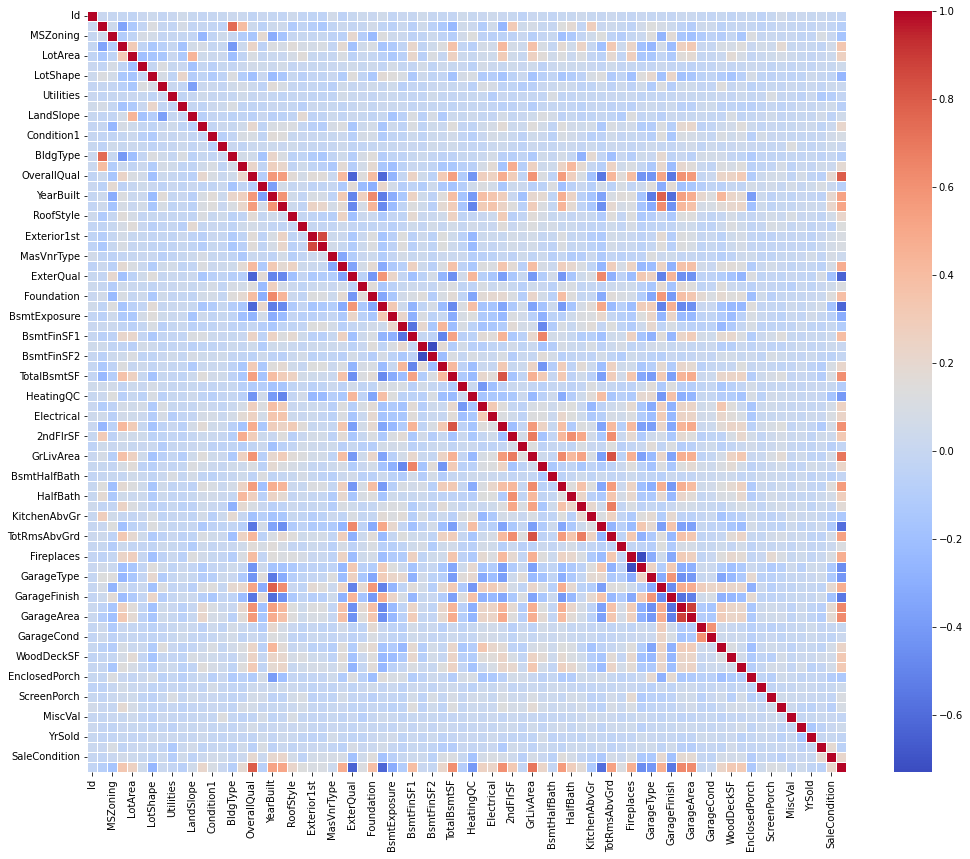

In [10]:
plt.figure(figsize=(17,14))
sns.heatmap(filee.corr(), cmap='coolwarm', annot=False, linewidth=0.5)

**Scatter Plot Few Features**

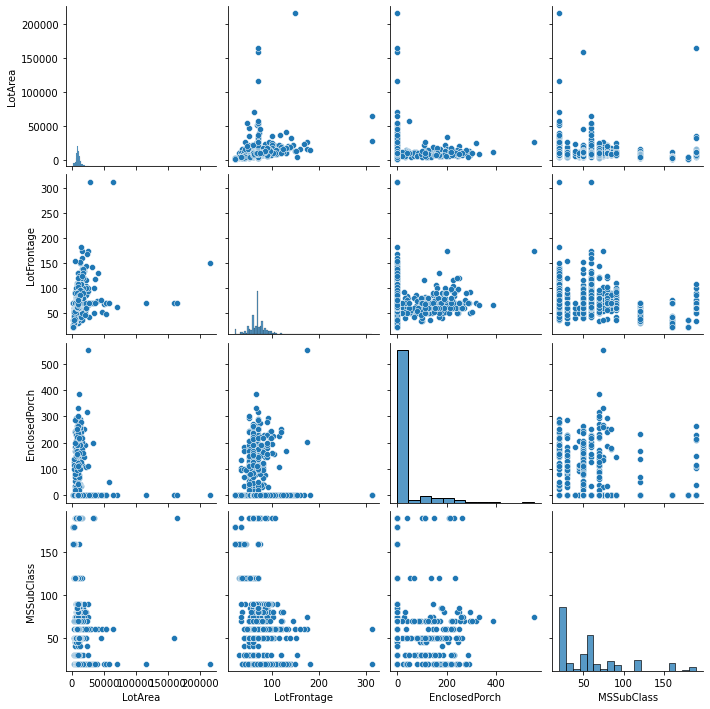

In [11]:
data = filee[['LotArea','LotFrontage','EnclosedPorch','MSSubClass']]

sns.pairplot(data, kind="scatter")
plt.show()

**Figure To Show Relationship Of Some Features With Sale Price**

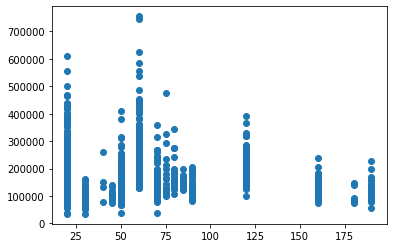

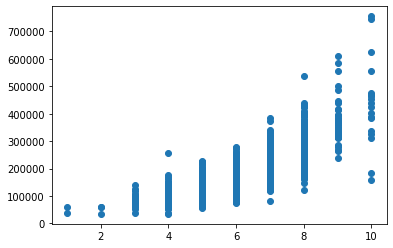

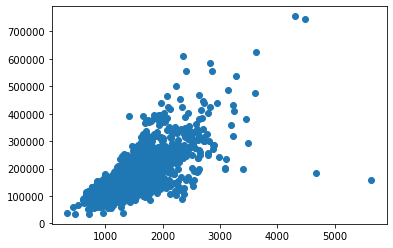

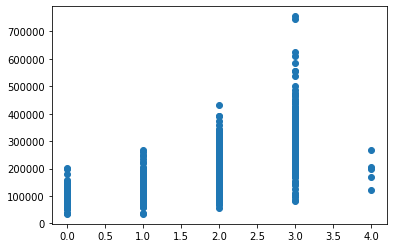

In [12]:
plt.scatter(filee['MSSubClass'], filee['SalePrice'])
plt.show()
plt.scatter(filee['OverallQual'], filee['SalePrice'])
plt.show()
plt.scatter(filee['GrLivArea'], filee['SalePrice'])
plt.show()
plt.scatter(filee['GarageCars'], filee['SalePrice'])
plt.show()

**Feature Scaling Using MinMax Scaler**

In [13]:
scaler = MinMaxScaler()
filee = scaler.fit_transform(filee.to_numpy())
filee = pd.DataFrame(filee, columns=[

'Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch','PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice'])

**X Contain Features And Y Contain Label**

In [14]:
Y=filee.SalePrice
X=filee.drop('SalePrice',axis=1)

**Training Testing Splitting(Keeping 20% For Test)**

In [15]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

**Train Model Using Advance Regression Technique**

In [16]:
reg = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=5, random_state=0).fit(x_train, y_train)
reg.score(x_test, y_test)

0.8973856446815571

**Loading Testing Dataset**

In [17]:
fileee=pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

**Dropping Some Features Which Have Maximum Missing Values In Test Dataset**

In [18]:
fileee.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace = True)

**Extracting Float/Int Missing Values And Apply Mean Values In Each Column Below In Test Dataset**

In [19]:
floattt=fileee[['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']]
for i in floattt:
    fileee[i]=fileee[i].fillna(fileee[i].mean())

**Changing Mixed Data Types Into String And Apply Modal Values On Testing Dataset**

In [20]:
objecttt=fileee[['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType']].astype('str')
for k in objecttt:
    fileee[k]=fileee[k].fillna(fileee[k].mode())

**Changing Mixed Data Type Into String And Apply Label Encoding On All Features On Testing Dataset**

In [21]:
objecttt_total=fileee[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']]=fileee[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']].astype('str')
for j in objecttt_total:
    fileee[j]= label_encoder.fit_transform(fileee[j])

**Predicting Performance On X_test Part Of Train Dataset**

In [22]:
yp=reg.predict(x_test)

**Deployment Of Model On Test Dataset**

In [23]:
yyy=reg.predict(fileee)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- BsmtCond
Feature names seen at fit time, yet now missing:
- FireplaceQu

  warnings.warn(message, FutureWarning)


**RMSE Value**

In [24]:
print(np.sqrt(metrics.mean_squared_error(y_test, yp)))

0.04165522411427183


**Creating Valid Submission File**

In [25]:
#yyy=pd.DataFrame(yyy)
#sub=pd.read_csv('sample_submission.csv')
#submission=pd.concat([sub['Id'], yyy], axis=1)
#submission.columns=['Id', 'SalePrice']
#submission.to_csv("C:/Users/Hp/OneDrive/Desktop/Submissionn.csv", index=False)